# 数据可视化



姓名：杨小伟    学号：19340246005          学院：计算机科学技术学院

  【摘要】这次的可视化数据是从世界银行网站下载的世界各国1960年-2020年之间的GDP数值（单位为美元USD）。而这次的project将算出2000年到2020年GDP增长率全球前十的国家然后进行可视化。

# 导入环境

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 读取数据 

通过观察可以看到GDP.csv文件中前四行都是无用数据，所以可以在读取数据时跳过。

In [39]:
data = pd.read_csv("GDP.csv",skiprows = [0,1,2,3])
data.head() #打印前5行数据进行检查

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.498491e+11,9.635604e+11,9.837486e+11,9.186471e+11,8.720235e+11,9.842556e+11,1.011723e+12,1.008375e+12,9.188155e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,7.275714e+11,8.207876e+11,8.514872e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


# 处理数据

因为需要绘制关于2000-2020年的GDP增长率前十的国家，所以只需要保留国家名字和代号以及这两年的GDP数据。

In [40]:
data = data.drop(columns=['Indicator Name', 'Indicator Code'], axis=1) #删除无用列
col = ['Country Name','Country Code','2000', '2020'] #选择指定列的数据
data = data[col]
data = data.dropna(axis=0,how='any') #删除2000年和2020年含有nan的行
data.reset_index(drop=True, inplace = True) #重置index
data

,Country Name,Country Code,2000,2020
0,Africa Eastern and Southern,AFE,2.837516e+11,9.188155e+11
1,Africa Western and Central,AFW,1.404080e+11,7.845876e+11
2,Angola,AGO,9.129635e+09,5.837598e+10
3,Albania,ALB,3.480355e+09,1.488763e+10
4,Arab World,ARB,8.158447e+11,2.436288e+12
...,...,...,...,...
226,World,WLD,3.417859e+13,8.467992e+13
227,Samoa,WSM,2.690197e+08,8.071008e+08
228,South Africa,ZAF,1.517534e+11,3.354421e+11
229,Zambia,ZMB,3.600683e+09,1.811063e+10


# 定义计算GDP增长率的函数

In [41]:
def cal(x, y):
    return ((y - x) / x) * 100

# 计算GDP增长率并排序

In [42]:
data['2000'] = data.apply(lambda row: cal(row['2000'], row['2020']), axis=1) #遍历dataframe并使用定义的函数计算增长率
data = data.rename(columns={'2000':'GDP increase rate(%)'}) #重命名列
top = data.sort_values(by = ['GDP increase rate(%)'],ascending= False) #根据增长率排序
col = ['Country Name', 'GDP increase rate(%)']
top = top[col] #保留所选列数据
top.reset_index(drop=True, inplace = True) #重置index
top = top.iloc[0:10] # 保留前10行数据
rank = pd.DataFrame(['1','2','3','4','5','6','7','8','9','10'],columns=['RANK']) #为前10行创建一行rank
top = pd.concat([top, rank], axis=1)
top = top.rename(columns={'Country Name':'Country_Name'}) #重命名列
top

,Country_Name,GDP increase rate(%),RANK
0,Ghana,1275.314993,1
1,Ethiopia,1205.992884,2
2,China,1115.401721,3
3,Mongolia,1070.993666,4
4,Lao PDR,1005.167373,5
5,Equatorial Guinea,858.113878,6
6,Tajikistan,852.231168,7
7,Kazakhstan,835.285519,8
8,Moldova,824.811817,9
9,Vietnam,769.863766,10


# 绘制图形

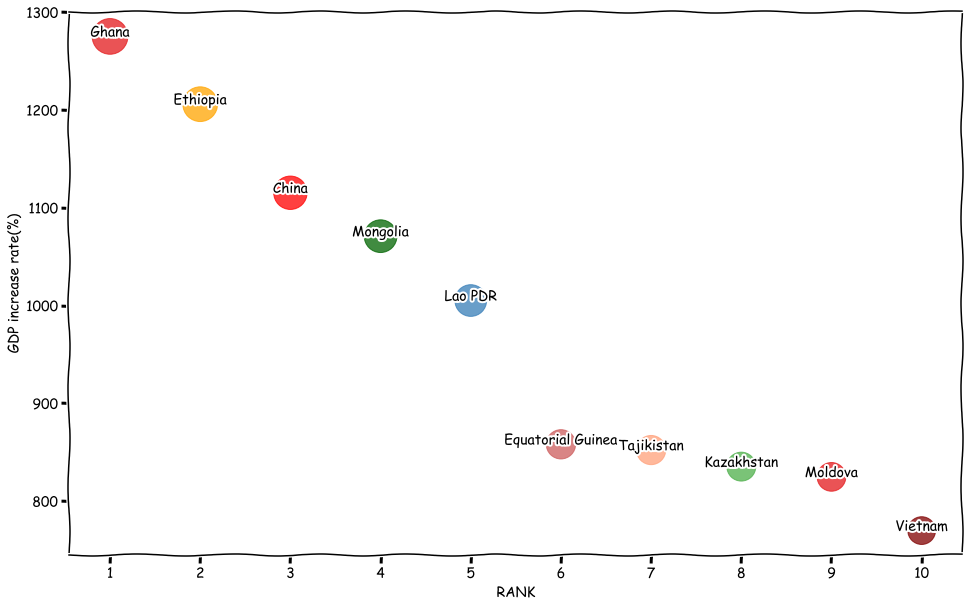

In [49]:
plt.xkcd() #使用xkcd风格绘图
fig = top.plot(x='RANK', y='GDP increase rate(%)', kind='scatter', 
                    c=['#e41a1c','#FFA500','#FF0000','#006400','#377eb8','#CD5C5C','#FFA07A','#4daf4a','#e41a1c','#800000'], 
                    xticks=range(0,10), s=top['GDP increase rate(%)'], alpha=.75, figsize=[16,10])
for i, txt in enumerate(top.Country_Name): #遍历国家名称并将其打印在图像上
    fig.annotate(txt, [top['RANK'][i], top['GDP increase rate(%)'][i]], ha='center')